In [1]:
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 데이터 불러오기
df = pd.read_csv('bitcoin_data.csv')
df.dropna(inplace=True)

# 이동평균 계산
df['DMI_P'] = ta.PLUS_DI(df['high'], df['low'], df['close'], timeperiod=14)
df['DMI_M'] = ta.MINUS_DI(df['high'], df['low'], df['close'], timeperiod=14)
df.dropna(inplace=True)

# 입력 데이터와 타겟 값 생성
X_P = df[['DMI_P']].values
X_M = df[['DMI_M']].values
Y = df['close'].values

# 데이터 스케일링
scaler = MinMaxScaler()

# 학습 데이터와 테스트 데이터 분할
X_P_train, X_P_test, Y_P_train, Y_P_test = train_test_split(X_P, Y, 
                                                    test_size=0.2, shuffle=False,
                                                            random_state=0)

X_M_train, X_M_test, Y_M_train, Y_M_test = train_test_split(X_M, Y, 
                                                    test_size=0.2, shuffle=False,
                                                            random_state=0)

# X 학습 테스트
X_P_train = scaler.fit_transform(X_P_train)
X_P_test = scaler.fit_transform(X_P_test)

X_M_train = scaler.fit_transform(X_M_train)
X_M_test = scaler.fit_transform(X_M_test)

# Y 학습 테스트
Y_P_train = scaler.fit_transform(Y_P_train.reshape(-1, 1)).flatten()
Y_P_test = scaler.fit_transform(Y_P_test.reshape(-1, 1)).flatten()

Y_M_train = scaler.fit_transform(Y_M_train.reshape(-1, 1)).flatten()
Y_M_test = scaler.fit_transform(Y_M_test.reshape(-1, 1)).flatten()

# 전체 비교용 X Y
X_P_scaled = scaler.fit_transform(X_P)
X_M_scaled = scaler.fit_transform(X_M)

Y_scaled = scaler.fit_transform(Y.reshape(-1, 1)).flatten()

# 모델 구축
model_P = LinearRegression()
model_M = LinearRegression()

# 모델 학습
model_P.fit(X_P_train, Y_P_train)
model_M.fit(X_M_train, Y_M_train)

# 테스트 데이터 예측
Y_P_pred = model_P.predict(X_P_test)
Y_M_pred = model_M.predict(X_M_test)

Y_P_pred_all = model_P.predict(X_P_scaled)
Y_M_pred_all = model_M.predict(X_M_scaled)

# 예측 결과 역스케일링
Y_P_pred_scaled = scaler.inverse_transform(Y_P_pred.reshape(-1, 1)).flatten()
Y_P_pred_scaled_all = scaler.inverse_transform(Y_P_pred_all.reshape(-1, 1)).flatten()

Y_M_pred_scaled = scaler.inverse_transform(Y_M_pred.reshape(-1, 1)).flatten()
Y_M_pred_scaled_all = scaler.inverse_transform(Y_M_pred_all.reshape(-1, 1)).flatten()

Y_test_scaled = scaler.inverse_transform(Y_scaled.reshape(-1, 1)).flatten()

print(Y_P_pred_scaled)
print(Y_M_pred_scaled)

[21622390.50787819 21545009.36754299 21459628.9513108  21791060.20024434
 21512707.02073456 21381191.99418384 22048418.96276981 21893038.99820546
 21816540.3364379  21696818.00613021 22018392.25963685 21892053.38444918
 22604752.45875069 22109459.60872346 21932376.60759615 21817246.67634686
 21625747.39446801 21262890.42748884 21062809.9338822  20796014.12370897
 20616541.69471065 20594728.67650478 20526430.07483356 20855322.62890321
 20748888.40130002 20684199.43895148 20582825.22479998 20503430.81346261
 20543527.87620056 20516466.61748283 20980444.61000626 20868933.99583798
 20801428.0457544  20980411.04996299 20870930.18772008 20787712.92059165
 20745506.25754216 20869009.46874418 22251771.50583119 22507022.18739228
 22183414.6332279  22057231.11528846 21919956.14927085 21872278.73930961
 21942930.00901162 22920909.01841706 22570843.13682933 22367385.6937641
 22279467.79774393 22096792.05206108 21932553.30254563 21655168.77771873
 21145095.27918674 20969781.8292363  20812655.272407

In [13]:
r2_train_P = r2_score(Y_P_train, model_P.predict(X_P_train))
r2_test_P = r2_score(Y_P_test, Y_P_pred)
r2_train_M = r2_score(Y_M_train, model_M.predict(X_M_train))
r2_test_M = r2_score(Y_M_test, Y_M_pred)

print(f"[r2_score with DMI+] train : {r2_train_P} / test : {r2_test_P}")
print(f"[r2_score with DMI-] train : {r2_train_M} / test : {r2_test_M}")

# mse
mse_P = mean_squared_error(Y_P_test, Y_P_pred)
mse_M= mean_squared_error(Y_M_test, Y_M_pred)

# rmse
rmse_P = np.sqrt(mse_P)
rmse_M = np.sqrt(mse_M)

print(f'[MSE with DMI+] : {mse_P:.3f}\n[RMSE with DMI+] : {rmse_P:.3f}')
print(f'[MSE with DMI-] : {mse_M:.3f}\n[RMSE with DMI-] : {rmse_M:.3f}')

[r2_score with DMI+] train : 0.37334628782847046 / test : 0.445424919160487
[r2_score with DMI-] train : 0.5283677534670165 / test : 0.44051891456419867
[MSE with DMI+] : 0.059
[RMSE with DMI+] : 0.243
[MSE with DMI-] : 0.060
[RMSE with DMI-] : 0.244


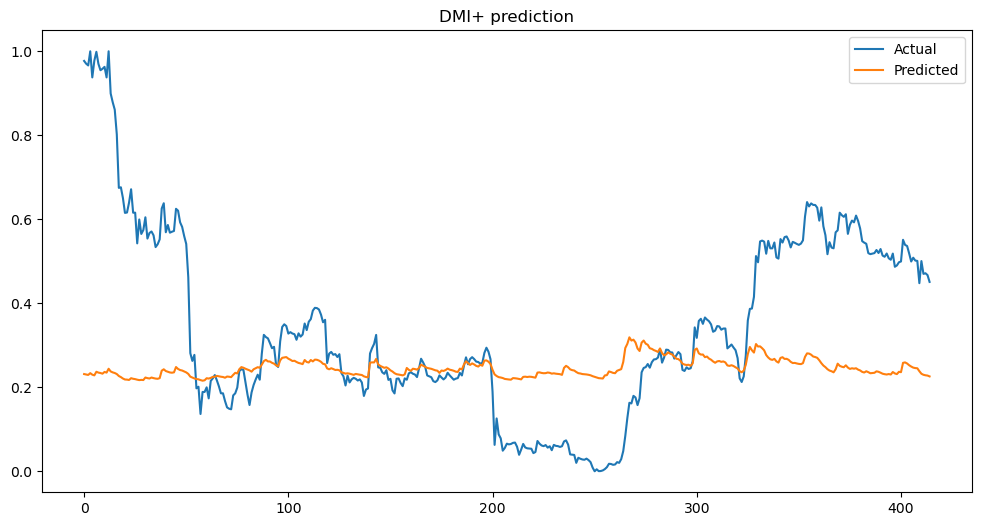

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(Y_P_test, label='Actual')
plt.plot(Y_P_pred, label='Predicted')
plt.title('DMI+ prediction')
#plt.axvline(149, 0, 1, color='lightgray', linestyle='--')
plt.legend()
plt.show()

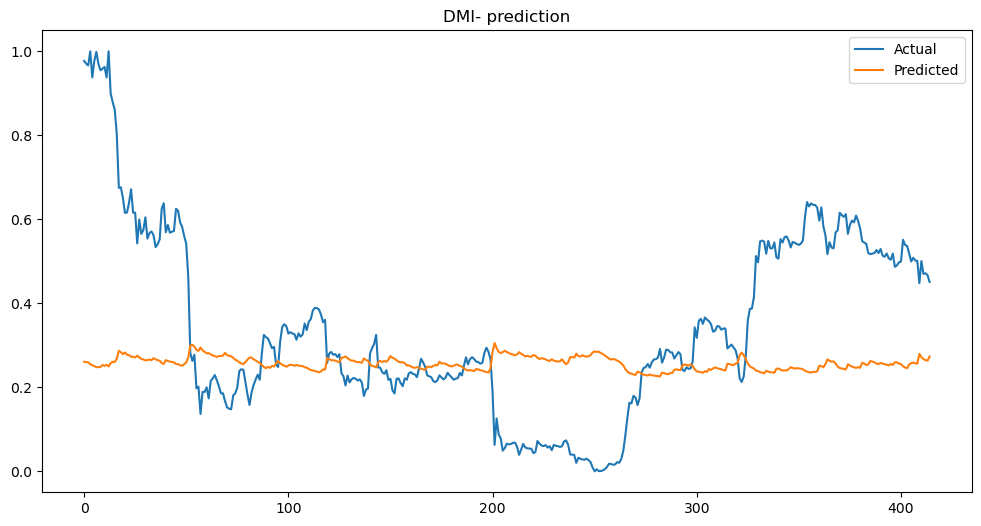

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(Y_M_test, label='Actual')
plt.plot(Y_M_pred, label='Predicted')
plt.title('DMI- prediction')
#plt.axvline(149, 0, 1, color='lightgray', linestyle='--')
plt.legend()
plt.show()

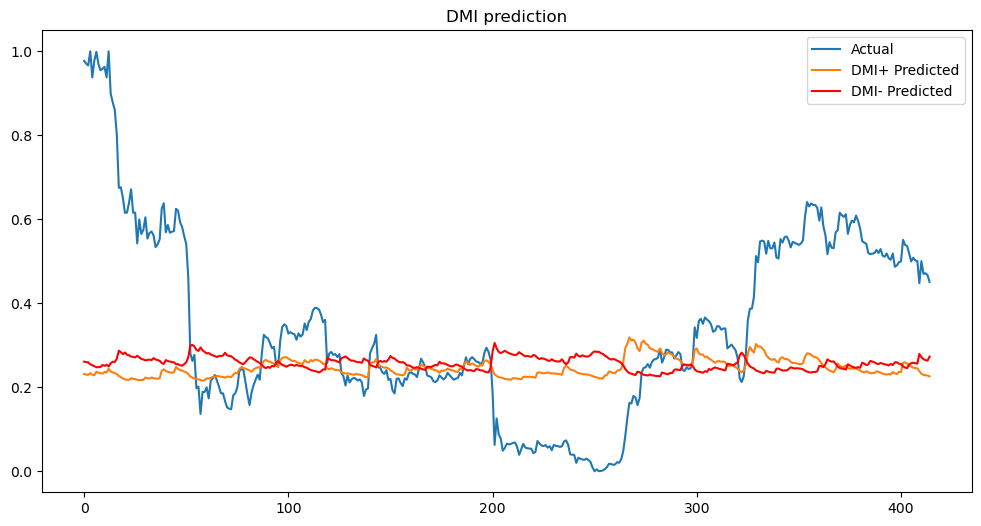

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(Y_M_test, label='Actual')
plt.plot(Y_P_pred, label='DMI+ Predicted')
plt.plot(Y_M_pred, label='DMI- Predicted', color='red')
plt.title('DMI prediction')
plt.legend()
plt.show()